# Machine Learning

All of our machine learning methods are implemented and evaluated in this file. There is no data-processing in this file.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Importing Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
import statistics

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('./data/computed/training_data.csv')
df = df.drop('Unnamed: 0', axis=1)

# We remove some categorical variables that won't be useful, such as the player's name
features = np.setdiff1d(df.columns,['Player','player_year', 'Tm', 'Signed'])

df['FT%'] = df['FT%'].fillna(0)
df['2P.1'] = df['2P.1'].fillna(0)
df['3PAr'] = df['3PAr'].fillna(0)
df['FG%'] = df['FG%'].fillna(0)
df['FTr'] = df['FTr'].fillna(0)
df['TS%'] = df['TS%'].fillna(0)
steve = df[df['Player'] == 'Steve Nash']

df = df[df['Player'] != 'Steve Nash']

features = np.setdiff1d(features,['Player','player_year', 'Tm', 'Signed'])
selected = df[features]
X = selected.drop('Dollars_Per_year', axis=1)
y = selected['Dollars_Per_year']

### OLS

In [14]:
# Linear Regression
total = 0
total_train = 0
for j in range(1,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = j)
    model = LinearRegression()
    model.fit(X_train,y_train)
    total = total + model.score(X_test,y_test)
    total_train = total_train + model.score(X_train,y_train)
print("Average test error ", total / 20)
print("Average train error ", total_train / 20)

Average test error  0.4455581051224219
Average train error  0.4843466818116828


### Kernel Ridge Regression - Polynomial Kernel


In [35]:
# Kernel Ridge Regression - Polynomial Kernel
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 40)
d_kernel_errors = []
for d in range(2,11):
    model = KernelRidge(kernel='polynomial', degree=d)
    cv_result = cross_validate(model, X_train, y_train, cv=5)
    test_scores = list(map(lambda x: max(x,0),cv_result['test_score']))
    cv_error = np.mean(test_scores)
    d_kernel_errors = d_kernel_errors + [(d,cv_error)]
pair = max(d_kernel_errors, key=lambda x: x[1])
degree = pair[0]
print("Best degree ", degree)
total = 0
total_train = 0
for j in range(1,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = j)
    model = KernelRidge(kernel='polynomial', degree=degree)
    model.fit(X_train, y_train)
    total = total + model.score(X_test,y_test)
    total_train = total_train + model.score(X_train,y_train)
print("Average test error ", total / 20)
print("Average train error ", total_train / 20)

Best degree  2
Average test error  0.49733183401899234
Average train error  0.68042653940745


### Kernel Ridge Regression - RBF Kernel


In [16]:
# RBF Kernel Regression
total = 0
total_train = 0
for j in range(1,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = j)
    model = KernelRidge(kernel='rbf')
    model.fit(X_train, y_train)
    total = total + model.score(X_test,y_test)
    total_train = total_train + model.score(X_train, y_train)
print("Average test error ", total / 20)
print("Average train error ", total_train / 20)

Average test error  0.17863671215136898
Average train error  0.7450056993017159


In [18]:
# Support Vector Regression - Polynomial Kernel

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
X_train_scaled = sklearn.preprocessing.scale(X_train)
X_test_scaled = sklearn.preprocessing.scale(X_test)
y_train_scaled = sklearn.preprocessing.scale(y_train)
y_test_scaled = sklearn.preprocessing.scale(y_test)

d_svr_errors = []
# for d in range(0,20):
#     model = SVR(kernel='poly', degree=d, cache_size=7000)
#     cv_result = cross_validate(model, X_train_scaled, y_train_scaled, cv=10)
#     cv_error = np.mean(cv_result['test_score'])
#     d_svr_errors = d_svr_errors + [(d,cv_error)]

# pair = max(d_svr_errors, key=lambda x: x[1])
# degree = pair[0]
# print(pair)

total = 0
total_train = 0
for j in range(1,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = j)
    X_train_scaled = sklearn.preprocessing.scale(X_train)
    X_test_scaled = sklearn.preprocessing.scale(X_test)
    y_train_scaled = sklearn.preprocessing.scale(y_train)
    y_test_scaled = sklearn.preprocessing.scale(y_test)
    model = SVR(kernel='poly', degree=3, cache_size=7000)
    model.fit(X_train_scaled, y_train_scaled)
    total = total + model.score(X_test_scaled,y_test_scaled)
    total_train = total_train + model.score(X_train_scaled, y_train_scaled)
print("Average test error ", total / 20)
print("Average train error ", total_train / 20)

Average test error  0.449763963394952
Average train error  0.6724220358287804


In [ ]:
# Support Vector Regression - Polynomial Kernel

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 40)
X_train_scaled = sklearn.preprocessing.scale(X_train)
X_test_scaled = sklearn.preprocessing.scale(X_test)
y_train_scaled = sklearn.preprocessing.scale(y_train)
y_test_scaled = sklearn.preprocessing.scale(y_test)
d_kernel_errors = []
for d in range(2,5):
    model = SVR(kernel='poly', degree=d, cache_size=7000)
    cv_result = cross_validate(model, X_train, y_train, cv=5)
    test_scores = list(map(lambda x: max(x,0),cv_result['test_score']))
    cv_error = np.mean(test_scores)
    d_kernel_errors = d_kernel_errors + [(d,cv_error)]
pair = max(d_kernel_errors, key=lambda x: x[1])
degree = pair[0]
print(degree)
total = 0
for j in range(1,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = j)
    X_train_scaled = sklearn.preprocessing.scale(X_train)
    X_test_scaled = sklearn.preprocessing.scale(X_test)
    y_train_scaled = sklearn.preprocessing.scale(y_train)
    y_test_scaled = sklearn.preprocessing.scale(y_test)
    model = SVR(kernel='poly', degree=degree, cache_size=7000)
    model.fit(X_train_scaled, y_train_scaled)
    total = total + model.score(X_test,y_test)
print("Average test error ", total / 20)
print("Average train error ", total_train / 20)

In [19]:
# Support Vector Regression - RBF Kernel
total = 0
total_train = 0
for j in range(1,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = j)
    X_train_scaled = sklearn.preprocessing.scale(X_train)
    X_test_scaled = sklearn.preprocessing.scale(X_test)
    y_train_scaled = sklearn.preprocessing.scale(y_train)
    y_test_scaled = sklearn.preprocessing.scale(y_test)
    model = SVR(kernel='rbf', cache_size=7000)
    model.fit(X_train_scaled, y_train_scaled)
    total = total + model.score(X_test_scaled,y_test_scaled)
    total_train = total_train + model.score(X_train_scaled, y_train_scaled)
print("Average test error ", total / 20)
print("Average train error ", total_train / 20)

Average test error  0.49253430217964134
Average train error  0.6253613097193982


# PCA Data Exploration 
... and algorithms using transformed data (via principal components) as input

Most correllated features with scaling:  ['PTS', 'FG', 'MP', 'FGA', 'WS', '2P']
Principal components and variance explained [0.32338257 0.1210564  0.05926459 0.04073321]


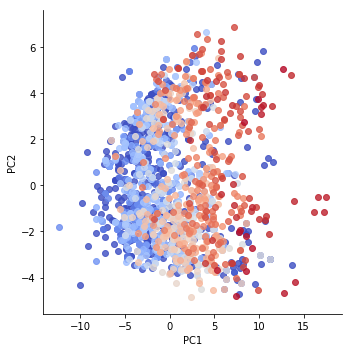

In [8]:
ncomp=4
pca = PCA(n_components=ncomp)
pca.fit(sklearn.preprocessing.scale(X))
pc_df = pca.fit_transform(sklearn.preprocessing.scale(X))
pc_df = pd.DataFrame(pc_df)

# Find features that are most correllated with principal components
pc = pd.DataFrame(pca.components_)
a = np.array(pc.iloc[0])
pc_features_idx = a.argsort()[-6:][::-1]
X_ren = X.copy()
cols = X.columns
pc_features = list(map(lambda x: cols[x],pc_features_idx))
print("Most correllated features with scaling: ",pc_features)
print("Principal components and variance explained", pca.explained_variance_ratio_)

pc_df['PC1'] = pc_df[0]
pc_df['PC2'] = pc_df[1]
pc_df['hue'] = y/max(y)
sns.lmplot(x = 'PC1', y = 'PC2', data = pc_df, hue = 'hue', palette = 'coolwarm', legend = False, fit_reg = False)

Most correllated features without scaling:  ['GS', 'G', 'MP']
Principal components and variance explained [0.75476666 0.16224479 0.04026452 0.01167905]


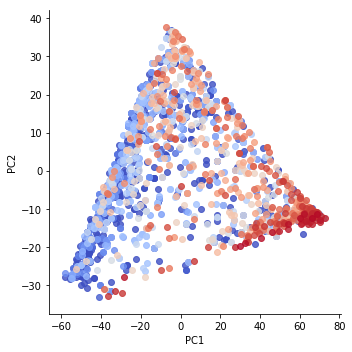

In [468]:
# PCA with unscaled data

pca = PCA(n_components=ncomp)
pca.fit(X)
pc_df = pca.fit_transform(X)
pc_df = pd.DataFrame(pc_df)

# Find features that are most correllated with principal components
pc = pd.DataFrame(pca.components_)
a = np.array(pc.iloc[0])
pc_features_idx = a.argsort()[-3:][::-1]
X_ren = X.copy()
cols = X.columns
pc_features = list(map(lambda x: cols[x],pc_features_idx))
print("Most correllated features without scaling: ",pc_features)
print("Principal components and variance explained", pca.explained_variance_ratio_)

pc_df['PC1'] = pc_df[0]
pc_df['PC2'] = pc_df[1]
pc_df['hue'] = y/max(y)
sns.lmplot(x = 'PC1', y = 'PC2', data = pc_df, hue = 'hue', palette = 'coolwarm', legend = False, fit_reg = False)

### Kernel Ridge Regression with and without PCA data transformations (scaled and unscaled)

In [21]:
# Kernel Ridge Regression with polynomial kernel using scaled data as input to PCA
X_train, X_test, y_train, y_test = train_test_split(sklearn.preprocessing.scale(X), y, test_size=0.10, random_state = 40)
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_new = pca.fit_transform(X_train)
X_train_new_df = pd.DataFrame(X_train_new)
X_test_new = pca.fit_transform(X_test)
X_test_new_df = pd.DataFrame(X_test_new)
d_kernel_errors = []
for d in range(1,11):
    model = KernelRidge(kernel='polynomial', degree=d)
    cv_result = cross_validate(model, X_train_new_df, y_train, cv=5)
    test_scores = list(map(lambda x: max(x,0),cv_result['test_score']))
    cv_error = np.mean(test_scores)
    d_kernel_errors = d_kernel_errors + [(d,cv_error)]
pair = max(d_kernel_errors, key=lambda x: x[1])
degree = pair[0]
print("Best degree ", degree)
total = 0
total_train = 0
for j in range(1,21):
    X_train, X_test, y_train, y_test = train_test_split(sklearn.preprocessing.scale(X), y, test_size=0.10, random_state = j)
    pca = PCA(n_components=2)
    pca.fit(X_train)
    X_train_new = pca.fit_transform(X_train)
    X_train_new_df = pd.DataFrame(X_train_new)
    X_test_new = pca.fit_transform(X_test)
    X_test_new_df = pd.DataFrame(X_test_new)
    model = KernelRidge(kernel='polynomial', degree=degree)
    model.fit(X_train_new_df, y_train)
    total = total + model.score(X_test_new_df, y_test)
    total_train = total_train + model.score(X_train_new_df,y_train)
print("Average test error ", total / 20)
print("Average train error ", total_train / 20)

Best degree  2
Average test error  0.3290172983367201
Average train error  0.4043365052326723


In [22]:
# Kernel Ridge Regression with polynomial kernel using unscaled data as input to PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 40)
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_new = pca.fit_transform(X_train)
X_train_new_df = pd.DataFrame(X_train_new)
X_test_new = pca.fit_transform(X_test)
X_test_new_df = pd.DataFrame(X_test_new)
d_kernel_errors = []
for d in range(1,11):
    model = KernelRidge(kernel='polynomial', degree=d)
    cv_result = cross_validate(model, X_train_new_df, y_train, cv=5)
    test_scores = list(map(lambda x: max(x,0),cv_result['test_score']))
    cv_error = np.mean(test_scores)
    d_kernel_errors = d_kernel_errors + [(d,cv_error)]
pair = max(d_kernel_errors, key=lambda x: x[1])
degree = pair[0]
print(degree)
total = 0
total_train = 0
for j in range(1,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = j)
    pca = PCA(n_components=2)
    pca.fit(X_train)
    X_train_new = pca.fit_transform(X_train)
    X_train_new_df = pd.DataFrame(X_train_new)
    X_test_new = pca.fit_transform(X_test)
    X_test_new_df = pd.DataFrame(X_test_new)
    model = KernelRidge(kernel='polynomial', degree=degree)
    model.fit(X_train_new_df, y_train)
    total = total + model.score(X_test_new_df, y_test)
    total_train = total_train + model.score(X_train_new_df, y_train)
print("Average test error ", total / 20)
print("Average train error ", total_train / 20)

3
Average test error  0.23221234181416045
Average train error  0.27166388697709953


### Nearest Neighbor Regression with and without PCA data transformations (scaled and unscaled)

In [23]:
#Nearest Neighbor data transformations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 40)
d_kernel_errors = []
for d in range(1,30):
    model = KNeighborsRegressor(n_neighbors=d, n_jobs=1)
    cv_result = cross_validate(model, X_train, y_train, cv=5)
    test_scores = list(map(lambda x: max(x,0),cv_result['test_score']))
    cv_error = np.mean(test_scores)
    d_kernel_errors = d_kernel_errors + [(d,cv_error)]
pair = max(d_kernel_errors, key=lambda x: x[1])
degree = pair[0]
print("Number of neighbors", degree)
total = 0
total_train = 0
for j in range(1,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = j)
    model = KNeighborsRegressor(n_neighbors=degree, n_jobs=1)
    model.fit(X_train, y_train)
    total = total + model.score(X_test, y_test)
    total_train = total_train + model.score(X_train, y_train)
    
print("Average test error ", total / 20)
print("Average train error ", total_train / 20)

Number of neighbors 15
Average test error  0.40682462644617046
Average train error  0.46560394456165677


In [29]:
#Nearest Neighbor with PCA scaled data transformations

X_train, X_test, y_train, y_test = train_test_split(sklearn.preprocessing.scale(X), y, test_size=0.10, random_state = 40)
pca = PCA(n_components=4)
pca.fit(X_train)
X_train_new = pca.fit_transform(X_train)
X_train = pd.DataFrame(X_train_new)
X_test_new = pca.fit_transform(X_test)
X_test = pd.DataFrame(X_test_new)

d_kernel_errors = []
for d in range(1,30):
    model = KNeighborsRegressor(n_neighbors=d, n_jobs=1)
    cv_result = cross_validate(model, X_train, y_train, cv=10)
    test_scores = list(map(lambda x: max(x,0),cv_result['test_score']))
    cv_error = np.mean(test_scores)
    d_kernel_errors = d_kernel_errors + [(d,cv_error)]
pair = max(d_kernel_errors, key=lambda x: x[1])
degree = pair[0]
print("Number of neighbors", degree)
total = 0
total_train = 0
for j in range(1,21):
    X_train, X_test, y_train, y_test = train_test_split(sklearn.preprocessing.scale(X), y, test_size=0.10, random_state = j)
    pca = PCA(n_components=4)
    pca.fit(X_train)
    X_train_new = pca.fit_transform(X_train)
    X_train = pd.DataFrame(X_train_new)
    X_test_new = pca.fit_transform(X_test)
    X_test = pd.DataFrame(X_test_new)
    model = KNeighborsRegressor(n_neighbors=degree, n_jobs=1)
    model.fit(X_train, y_train)
    total = total + model.score(X_test, y_test)
    total_train = total_train + model.score(X_train, y_train)
print("Average test error ", total / 20)
print("Average train error ", total_train / 20)

Number of neighbors 29
Average test error  0.3118971301794481
Average train error  0.4265080877295103


In [25]:
#Nearest Neighbor with PCA unscaled data transformations

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 40)
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_new = pca.fit_transform(X_train)
X_train_new_df = pd.DataFrame(X_train_new)
X_test_new = pca.fit_transform(X_test)
X_test_new_df = pd.DataFrame(X_test_new)
d_kernel_errors = []
for d in range(1,30):
    model = KNeighborsRegressor(n_neighbors=d, n_jobs=1)
    cv_result = cross_validate(model, X_train_new_df, y_train, cv=5)
    test_scores = list(map(lambda x: max(x,0),cv_result['test_score']))
    cv_error = np.mean(test_scores)
    d_kernel_errors = d_kernel_errors + [(d,cv_error)]
pair = max(d_kernel_errors, key=lambda x: x[1])
num_neighbors = pair[0]
print(num_neighbors)
total = 0
total_train = 0
for j in range(1,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = j)
    pca = PCA(n_components=2)
    pca.fit(X_train)
    X_train_new = pca.fit_transform(X_train)
    X_train_new_df = pd.DataFrame(X_train_new)
    X_test_new = pca.fit_transform(X_test)
    X_test_new_df = pd.DataFrame(X_test_new)
    model = KNeighborsRegressor(n_neighbors=num_neighbors, n_jobs=1)
    model.fit(X_train_new_df, y_train)
    total = total + model.score(X_test_new_df, y_test)
    total_train = total_train +model.score(X_train_new_df, y_train)
print("Average test error ", total / 20)
print("Average train error ", total_train / 20)

27
Average test error  0.21542198459289225
Average train error  0.3131610975263367


In [26]:
#XG Boost

import xgboost as xgb
from sklearn.metrics import r2_score

total = 0
total_train = 0
for j in range(1,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = j)
    xgtrain = xgb.DMatrix(X_train, y_train)
    xgtest = xgb.DMatrix(X_test)
    param = {'objective':'reg:linear'}
    # Some randos params: https://www.kaggle.com/fashionlee/using-xgboost-for-regression
    our_params={'eta':0.32,'seed':1,'subsample':1,'colsample_bytree':1
                ,'objective':'reg:linear','max_depth':6,'min_child_weight':1}
    bst = xgb.train(our_params, xgtrain)
    y_hat = bst.predict(xgtest)
    y_hat_train = bst.predict(xgtrain)
    total = total + r2_score(y_test, y_hat)
    total_train = total_train + r2_score(y_train, y_hat_train)
print("Average test error ", total / 20)
print("Average train error ", total_train / 20)

Average test error  0.5185413877064303
Average train error  0.8905098844926768
